In [1]:
#Erdogan Umut Demirel
#2106102064

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
file_path = 'Q2housingdata.xlsx'
explanation_path = 'Q2explanation.xlsx'



In [3]:
data = pd.read_excel(file_path, sheet_name='GYK_Hane')
explanations = pd.read_excel(explanation_path, sheet_name='Table 1')

In [4]:

# Açıklamalar tablosunu düzenleme
explanations_cleaned = explanations.rename(columns={
    explanations.columns[0]: "Kod",
    explanations.columns[1]: "Açıklama"
})[['Kod', 'Açıklama']].dropna()


In [5]:
# Kullanılacak sütunlar
final_columns = ['HB030', 'HB031', 'HH070', 'HS010', 'HS020', 'HS030', 'HS040', 'HS050', 'HS070', 'HE050']


In [6]:
# Sütunları filtreleme
filtered_df = data[final_columns]

In [7]:
# Kodlar ve açıklamaları eşleştirme
header_mapping = explanations_cleaned[explanations_cleaned['Kod'].isin(final_columns)].set_index('Kod')['Açıklama'].to_dict()

In [8]:

# Sütun adlarını açıklamalarla değiştirme
renamed_df = filtered_df.rename(columns=header_mapping)


In [9]:
renamed_df.head()

,"İstatistiki Bölge Birimleri Sınıflaması, 1. Düzey","İstatistiki Bölge Birimleri Sınıflaması, 2. Düzey",Oturulan konuttaki faydalanılan alanın metrekare olarak\nbüyüklüğü (m2),"Oturulan konutta sızdıran çatı, nemli duvarlar, çürümüş pencere çerçeveleri gibi bir problemin mevcut olma durumu","Oturulan konutta, konutun izolasyonundan dolayı ısınma sorunu olup olmadığı","Oturulan konutta, odaların karanlık olması veya yeterli ışık almaması gibi bir sorun olup olmadığı","Oturulan konutta, komşulardan veya sokaktan gelen gürültü probleminin olup olmadığı",Oturulan konutun kullanım alanının yeterli olup olmadığı,Yaşanılan çevrede suç veya şiddet olayları ile yoğun bir şekilde karşılaşılıp karşılaşılmadığı,Bir ay boyunca geçinebilmek için hanenin sahip olması gereken en düşük aylık net gelirin ne kadar olacağı
0,TR1,TR11,90,2,2,2,2,1,2,7000
1,TR1,TR11,120,1,1,2,2,1,2,3000
2,TR1,TR11,120,2,2,2,2,1,2,6000
3,TR1,TR11,100,2,2,2,2,1,1,4000
4,TR1,TR11,70,2,2,2,2,2,2,2000


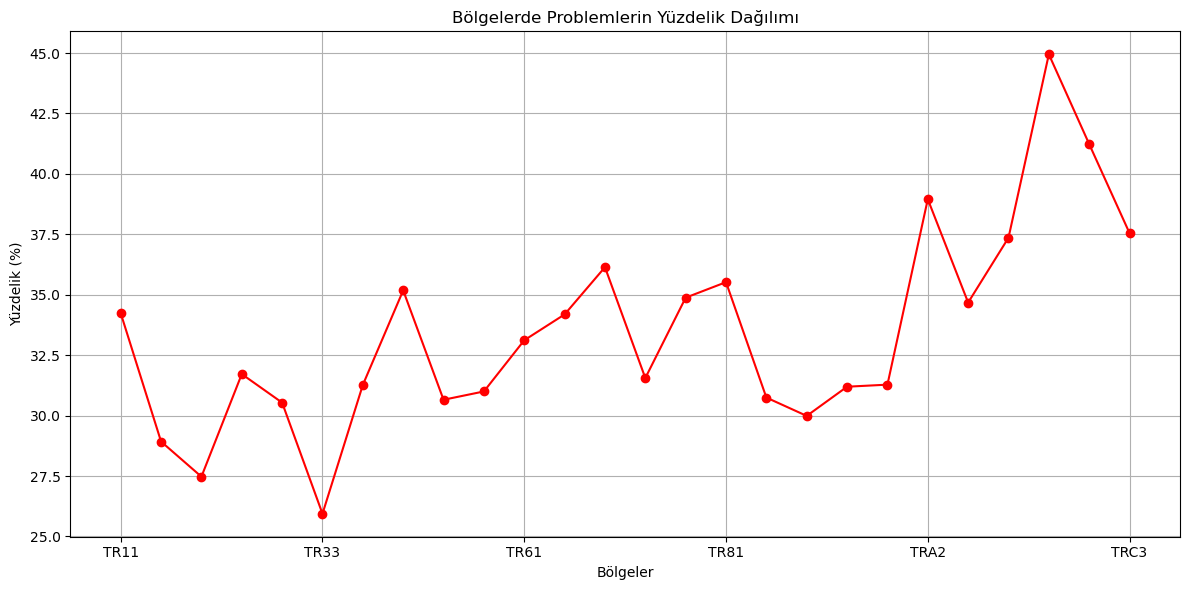

In [10]:
import matplotlib.pyplot as plt

selected_columns = ['HS010', 'HS020', 'HS030', 'HS040', 'HS050', 'HS070']
region_column = 'HB031' # Bölgeyi temsil eden sütun

# Veri hazırlama
data_for_analysis = data[selected_columns + [region_column]]

# 1 ve 2 değerlerine göre yüzdelik hesaplama
percentage_data = data_for_analysis.melt(id_vars=region_column, value_vars=selected_columns, var_name="Kriter", value_name="Değer")
percentage_summary = percentage_data.groupby([region_column, "Değer"]).size().unstack(fill_value=0)

# Yüzdeye çevirme
percentage_summary = percentage_summary.div(percentage_summary.sum(axis=1), axis=0) * 100

# Sadece "Kötü" (2) değerinin yüzdesini seçme
kotu_percentage = percentage_summary[1]

# Çizgisel grafik çizimi (sadece kötü)
kotu_percentage.plot(kind='line', figsize=(12, 6), marker='o', color='red')
plt.title("Bölgelerde Problemlerin Yüzdelik Dağılımı")
plt.xlabel("Bölgeler")
plt.ylabel("Yüzdelik (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# Veriyi yükleme
data_path = 'Q2housingdata.xlsx'
data_df = pd.read_excel(data_path, sheet_name='GYK_Hane')

# Bölgelerin açıklamaları
region_descriptions = {
    "TR11": "İstanbul",
    "TR21": "Tekirdağ, Edirne, Kırklareli",
    "TR22": "Balıkesir, Çanakkale",
    "TR31": "İzmir",
    "TR32": "Aydın, Denizli, Muğla",
    "TR33": "Manisa, Afyon, Kütahya, Uşak",
    "TR41": "Bursa, Eskişehir, Bilecik",
    "TR42": "Kocaeli, Sakarya, Düzce, Bolu, Yalova",
    "TR51": "Ankara",
    "TR52": "Konya, Karaman",
    "TR61": "Antalya, Isparta, Burdur",
    "TR62": "Adana, Mersin",
    "TR63": "Hatay, Kahramanmaraş, Osmaniye",
    "TR71": "Kırıkkale, Aksaray, Niğde, Nevşehir, Kırşehir",
    "TR72": "Kayseri, Sivas, Yozgat",
    "TR81": "Zonguldak, Karabük, Bartın",
    "TR82": "Kastamonu, Çankırı, Sinop",
    "TR83": "Samsun, Tokat, Çorum, Amasya",
    "TR90": "Trabzon, Ordu, Giresun, Rize, Artvin, Gümüşhane",
    "TRA1": "Erzurum, Erzincan, Bayburt",
    "TRA2": "Ağrı, Kars, Iğdır, Ardahan",
    "TRB1": "Malatya, Elazığ, Bingöl, Tunceli",
    "TRB2": "Van, Muş, Bitlis, Hakkari",
    "TRC1": "Gaziantep, Adıyaman, Kilis",
    "TRC2": "Şanlıurfa, Diyarbakır",
    "TRC3": "Mardin, Batman, Şırnak, Siirt",
}

def get_input_limits(hb031):
    """
    Belirtilen bölge (HB031) için mümkün olan minimum ve maksimum değerleri döndürür.
    """
    filtered_data = data_df[data_df['HB031'] == hb031]

    if filtered_data.empty:
        return f"Seçilen bölge ({hb031}) için veri bulunamadı. Lütfen bölgeyi kontrol edin."

    min_income = filtered_data['HE050'].min()
    max_income = filtered_data['HE050'].max()

    return {"Min Net Gelir (HE050)": min_income, "Max Net Gelir (HE050)": max_income}

def get_area_limits(hb031, min_income, max_income):
    """
    Belirtilen bölge ve gelir aralığı için uygun konut büyüklüklerini döndürür.
    """
    filtered_data = data_df[
        (data_df['HB031'] == hb031) &
        (data_df['HE050'] >= min_income) &
        (data_df['HE050'] <= max_income)
    ]

    if filtered_data.empty:
        return f"Seçilen bölge ve gelir için uygun konut bulunamadı."

    min_area = filtered_data['HH070'].min()
    max_area = filtered_data['HH070'].max()

    return {"Min Konut Metrekare (HH070)": min_area, "Max Konut Metrekare (HH070)": max_area}

def problem_analysis_ratio_with_assessment(hb031, min_income, max_income, min_area, max_area):
    """
    Belirtilen bölge (HB031), gelir ve konut büyüklüğüne göre problem oranını hesaplar ve bölgeyi değerlendirir.
    """
    filtered_data = data_df[
        (data_df['HB031'] == hb031) &
        (data_df['HE050'] >= min_income) &
        (data_df['HE050'] <= max_income) &
        (data_df['HH070'] >= min_area) &
        (data_df['HH070'] <= max_area)
    ]

    if filtered_data.empty:
        return f"Seçilen kriterlere uygun veri bulunamadı. Lütfen bilgilerinizi kontrol edin."

    problem_columns = ['HS010', 'HS020', 'HS030', 'HS040', 'HS050', 'HS070']
    problem_counts = (filtered_data[problem_columns] == 1).sum(axis=1).sum()
    total_homes = len(filtered_data) * len(problem_columns)

    problem_ratio = problem_counts / total_homes

    if problem_ratio < 0.1:
        assessment = "Yasam Kosullari cok iyi"
    elif 0.1 <= problem_ratio < 0.2:
        assessment = "Yasam kosullari iyi"
    elif 0.2 <= problem_ratio < 0.5:
        assessment = "Yasam kosullari orta"
    elif 0.5 <= problem_ratio < 0.7:
        assessment = "Yasam kosullari koyu"
    else:
        assessment = "Yasam kosullari cok kotu"

    return f" Değerlendirme: {assessment}"

# Kullanıcıdan giriş alıp analizi gerçekleştirme
print("Bölgeler:")
for code, description in region_descriptions.items():
    print(f"{code}: {description}")

hb031_input = input("Oturulan bölgeyi seçin : ")

limits = get_input_limits(hb031_input)
if isinstance(limits, dict):
    print("Seçilen bölge için girebileceğiniz net gelir aralığı:")
    for key, value in limits.items():
        print(f"{key}: {value}")

    min_income_input = int(input("En düşük net geliri giriniz: "))
    max_income_input = int(input("En yüksek net geliri giriniz: "))
    area_limits = get_area_limits(hb031_input, min_income_input, max_income_input)
    if isinstance(area_limits, dict):
        print("Seçilen gelir aralığı için uygun konut metrekare aralığı:")
        for key, value in area_limits.items():
            print(f"{key}: {value}")

        min_area_input = int(input("Konutun minimum metrekaresini giriniz: "))
        max_area_input = int(input("Konutun maksimum metrekaresini giriniz: "))

        result = problem_analysis_ratio_with_assessment(
            hb031_input, min_income_input, max_income_input, min_area_input, max_area_input
        )
        print(result)
    else:
        print(area_limits)
else:
    print(limits)




Bölgeler:
TR11: İstanbul
TR21: Tekirdağ, Edirne, Kırklareli
TR22: Balıkesir, Çanakkale
TR31: İzmir
TR32: Aydın, Denizli, Muğla
TR33: Manisa, Afyon, Kütahya, Uşak
TR41: Bursa, Eskişehir, Bilecik
TR42: Kocaeli, Sakarya, Düzce, Bolu, Yalova
TR51: Ankara
TR52: Konya, Karaman
TR61: Antalya, Isparta, Burdur
TR62: Adana, Mersin
TR63: Hatay, Kahramanmaraş, Osmaniye
TR71: Kırıkkale, Aksaray, Niğde, Nevşehir, Kırşehir
TR72: Kayseri, Sivas, Yozgat
TR81: Zonguldak, Karabük, Bartın
TR82: Kastamonu, Çankırı, Sinop
TR83: Samsun, Tokat, Çorum, Amasya
TR90: Trabzon, Ordu, Giresun, Rize, Artvin, Gümüşhane
TRA1: Erzurum, Erzincan, Bayburt
TRA2: Ağrı, Kars, Iğdır, Ardahan
TRB1: Malatya, Elazığ, Bingöl, Tunceli
TRB2: Van, Muş, Bitlis, Hakkari
TRC1: Gaziantep, Adıyaman, Kilis
TRC2: Şanlıurfa, Diyarbakır
TRC3: Mardin, Batman, Şırnak, Siirt
Seçilen bölge için girebileceğiniz net gelir aralığı:
Min Net Gelir (HE050): 250
Max Net Gelir (HE050): 40000
Seçilen gelir aralığı için uygun konut metrekare aralığı:
Min

In [ ]:

output_xlsx_path = 'Q2_final.xlsx'
renamed_df.to_excel(output_xlsx_path, index=False)

print(f"SON VERI, '{output_xlsx_path}' dosyasına kaydedildi.")